In [197]:
import pandas as pd

#warning 지우기
import warnings
warnings.filterwarnings(action='ignore')

행정구역별 인구수

In [198]:
df = pd.read_excel('행정구역_202401.xlsx', skiprows=1)
df.head(2)

,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,51313912,25558944,25754968
1,서울특별시,9384325,4538354,4845971


In [199]:
df1 = df.copy()
df1.columns = ['행정구역2', '총인구수', '남자인구수', '여자인구수']
df1['행정구역1']=''
df1.head(2)

,행정구역2,총인구수,남자인구수,여자인구수,행정구역1
0,전국,51313912,25558944,25754968,
1,서울특별시,9384325,4538354,4845971,


In [200]:
df2 = df1.copy()
cols = list(df1.columns)
df2 = df1[[cols[-1]] + cols[0:-1]]
df2.head(2)

,행정구역1,행정구역2,총인구수,남자인구수,여자인구수
0,,전국,51313912,25558944,25754968
1,,서울특별시,9384325,4538354,4845971


In [201]:
sidos = ['특별시', '광역시', '자치시', '자치도', '북도', '남도', '경기도']

for i in range(1, len(df2)):
    for sido in sidos:
        if sido in df2.loc[i, '행정구역2']:
            df2.loc[i, '행정구역1'] = df2.loc[i, '행정구역2']
            df2.loc[i, '행정구역2'] = '소계'

In [202]:
for i in range(2, len(df2)):
    if df2.loc[i, '행정구역1'] == '':
        df2.loc[i, '행정구역1'] = df2.loc[i-1, '행정구역1']

df2.loc[0, '행정구역1'] = '전국'
df2.loc[0, '행정구역2'] = '합계'

df2['행정구역2'] = df2['행정구역2'].str.strip()  #str => 행전체 바꿀때

df2.head()

,행정구역1,행정구역2,총인구수,남자인구수,여자인구수
0,전국,합계,51313912,25558944,25754968
1,서울특별시,소계,9384325,4538354,4845971
2,서울특별시,종로구,139378,67240,72138
3,서울특별시,중구,121322,58651,62671
4,서울특별시,용산구,212175,101793,110382


In [203]:
df2.to_csv('행정구역별인구수.csv')

In [204]:
df3 = pd.read_csv('행정구역별인구수.csv', index_col=0)
df3.head()

,행정구역1,행정구역2,총인구수,남자인구수,여자인구수
0,전국,합계,51313912,25558944,25754968
1,서울특별시,소계,9384325,4538354,4845971
2,서울특별시,종로구,139378,67240,72138
3,서울특별시,중구,121322,58651,62671
4,서울특별시,용산구,212175,101793,110382


In [205]:
df2['행정구역1'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전북특별자치도',
       '전라남도', '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [206]:
df2['행정구역2'].unique()

array(['합계', '소계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '서구',
       '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구',
       '연제구', '수영구', '사상구', '기장군', '수성구', '달서구', '달성군', '군위군', '중구영종출장소',
       '중구용유출장소', '미추홀구', '연수구', '남동구', '부평구', '계양구', '서구검단출장소', '강화군',
       '옹진군', '광산구', '유성구', '대덕구', '울주군', '세종시', '수원시', '장안구', '권선구',
       '팔달구', '영통구', '성남시', '수정구', '중원구', '분당구', '의정부시', '안양시', '만안구',
       '동안구', '부천시', '원미구', '소사구', '오정구', '광명시', '평택시', '송탄출장소', '안중출장소',
       '동두천시', '안산시', '상록구', '단원구', '고양시', '덕양구', '일산동구', '일산서구', '과천시',
       '구리시', '남양주시', '풍양출장소', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시',
       '처인구', '기흥구', '수지구', '파주시', '이천시', '안성시', '김포시', '화성시', '화성시동부출장소',
       '화성시동탄출장소', '광주시', '양주시', '포천시', '여주시', '연천군', '가평군', '양평군', '춘천시',
       '원주시', '강릉시', '동해시', '태백시', '속초시', '삼척시', '홍천군', '횡

In [214]:
filt = df3['행정구역2'] == '소계'
df3 = df3[filt]
df3.head()

,행정구역1,행정구역2,총인구수,남자인구수,여자인구수
164,충청북도,소계,1592155,809830,782325
180,충청남도,소계,2130509,1092059,1038450
290,제주특별자치도,소계,674353,337578,336775
198,전북특별자치도,소계,1752921,872493,880428
215,전라남도,소계,1802672,908705,893967


In [215]:
group = df3.groupby('행정구역1')['총인구수'].sum()
df4 = group.to_frame('총인구수')
sort = df4.sort_values('총인구수', ascending=False)

df5 = sort[:10]  #Top10
df5 = df5.sort_index()
df5

,총인구수
행정구역1,
경기도,13635250
경상남도,3248703
경상북도,2551370
대구광역시,2373844
부산광역시,3290964
서울특별시,9384325
인천광역시,3000454
전라남도,1802672
전북특별자치도,1752921


In [209]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

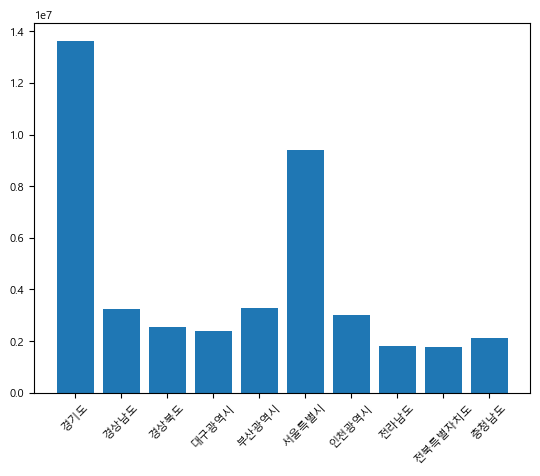

In [210]:
#top 10
plt.bar(df5.index, df5['총인구수'])

plt.xticks(df5.index, rotation=45)

plt.show()

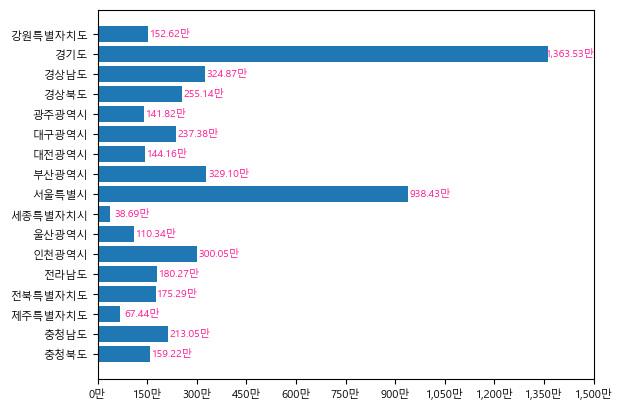

In [242]:
#전체
plt.rc('font', size='8')
plt.barh(df3['행정구역1'], df3['총인구수']/10000)

xticks = [i for i in range(0, 1501, 150)]
plt.xticks(xticks, [f'{x:,}만' for x in xticks])

for i, p in enumerate(df3['총인구수']/10000):
    plt.text(p+67, i-0.1, f'{p:,.02f}만', ha='center', color = 'deeppink', size=7.5)

plt.show()